In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

In [4]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [5]:
from IPython.display import HTML
style = '<style>svg{width:30% !important;height:30% !important;}</style>'
HTML(style)

In [6]:
from sklearn.model_selection import cross_val_score

<Axes: xlabel='max_depth', ylabel='score'>

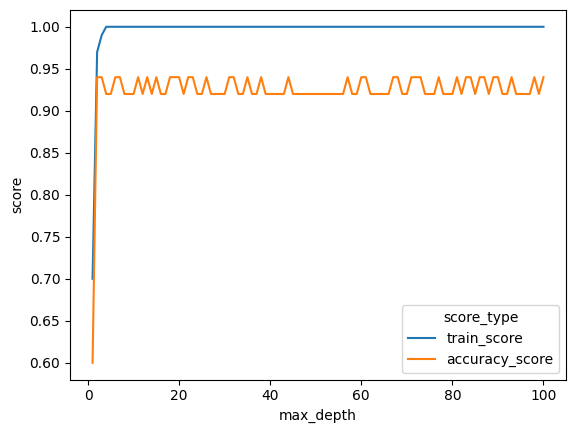

In [63]:
iris_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
X_train = iris_data.iloc[0:, 0:4]
y_train = iris_data.species
iris_test_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
X_test = iris_test_data.iloc[0:, 0:4]
y_test = iris_test_data.species
iris_scores = pd.DataFrame()
np.random.seed(0)
for i in range(1, 101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    score = clf.score(X_train, y_train)
    accuracy_score = clf.score(X_test, y_test)
    score_data = pd.DataFrame({'max_depth': [i], 'train_score': [score], 'accuracy_score': [accuracy_score]})
    iris_scores = pd.concat([iris_scores, score_data])
iris_scores = pd.melt(iris_scores, id_vars=['max_depth'],
                      value_vars=['train_score', 'accuracy_score'], 
                      var_name='score_type',
                      value_name='score')
sns.lineplot(data=iris_scores, x='max_depth', y='score', hue='score_type')